<a href="https://colab.research.google.com/github/KellyTamez/Artificial_Intelligence/blob/main/A3_Training_an_Artificial_Neural_Network_on_the_MNIST_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence.**
**A3.-Training an Artificial Neural Network on the MNIST dataset.**

**Instructor:** ENG. Daniel Isaías López Paez.

**Name:** Kelly Marlen Tamez González 

**Student ID:** 1925823

**Class Date and Time:** Tuesday N4.

In [1]:
#IMPORTING LIBRARIES
import tensorflow as tf 
from tensorflow import keras
from keras.datasets import mnist #this function imports the handwritten digits MNIST dataset automatically instead of us using it from the internet
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt #so it is possible to graph the models behaviour
import numpy as np #this function is to save the data

11490434/11490434 [==============================] - 0s 0us/step


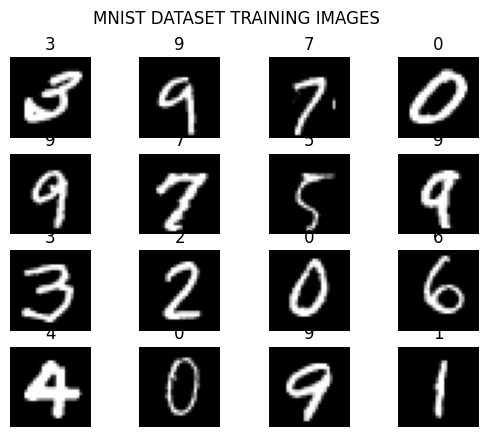

In [2]:
#PREPROCESSING DATA
(x_train, y_train), (x_test, y_test) = mnist.load_data() #this is used to form an array to save the training/testing data, and their categories

ids_imgs = np.random.randint (0,x_train.shape[0],16) #16 examples are selected from the 60,000 images to train
for i in range(len(ids_imgs)):
  img = x_train[ids_imgs[i],:,:] #images are assigned and used to train the neural network
  plt.subplot(4,4,i+1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(y_train[ids_imgs[i]])
plt.suptitle('MNIST DATASET TRAINING IMAGES')
plt.show() #images of the dataset are shown once the image corresponds to the number said image is assigned to on the dataset information

In [3]:
#PREPROCESSING
X_train = np.reshape( x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]) ) #the data is flattened (the 70,000 images) in a 60,000 row x 784 columns array
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )  #the remaining data is flattened (from the 70,000 images) in a 10,000 row x 784 columns array

In [4]:
#NORMALIZATION
X_train = X_train/255.0 #the image size is divided by the maximum pixel quantity of the images (255)
X_test = X_test/255.0 #the same is done to make sure the input datasets (both training and testing) have values between 0 and 1

nclasses = 10 #the output layer size is equal to 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [5]:
np.random.seed(1) #it is used to enhance reproductibility of the model
input_dim= X_train.shape[1]
output_dim= Y_train.shape[1]
model = Sequential() 
model.add (Dense(15,input_dim=input_dim, activation= 'relu')) #the model's input layer is created
model.add (Dense(output_dim, activation = 'softmax')) #the model's output layer is created
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#COMPILATION
sgd = SGD(lr=0.2) #a 0.2 learning rate is used in a descending gradient method
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #categorical crossentropy is used because softmax is being used

num_epochs = 10 #ten iterations are used
batch_size = 1024 #1024 is used to delimit the quantity of data that is displayed (instead of the 60,000 images)
history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
59/59 - 1s - loss: 0.9333 - accuracy: 0.7479 - 1s/epoch - 19ms/step
Epoch 2/10
59/59 - 0s - loss: 0.4367 - accuracy: 0.8811 - 395ms/epoch - 7ms/step
Epoch 3/10
59/59 - 0s - loss: 0.3697 - accuracy: 0.8962 - 413ms/epoch - 7ms/step
Epoch 4/10
59/59 - 0s - loss: 0.3360 - accuracy: 0.9054 - 385ms/epoch - 7ms/step
Epoch 5/10
59/59 - 0s - loss: 0.3152 - accuracy: 0.9105 - 399ms/epoch - 7ms/step
Epoch 6/10
59/59 - 0s - loss: 0.2986 - accuracy: 0.9154 - 383ms/epoch - 6ms/step
Epoch 7/10
59/59 - 0s - loss: 0.2863 - accuracy: 0.9189 - 396ms/epoch - 7ms/step
Epoch 8/10
59/59 - 0s - loss: 0.2757 - accuracy: 0.9222 - 398ms/epoch - 7ms/step
Epoch 9/10
59/59 - 0s - loss: 0.2661 - accuracy: 0.9258 - 388ms/epoch - 7ms/step
Epoch 10/10
59/59 - 0s - loss: 0.2574 - accuracy: 0.9281 - 391ms/epoch - 7ms/step


In [7]:
#HOW PRECISE IS THE MODEL
score = model.evaluate(X_test, Y_test,verbose=0) #the input data of the 10,000 testing images is introduced to define the categories the model will predict to the category the image actually belongs to
print('Validation Set Precission: {:.1f}%'. format(100*score[1])) #the precission the model will have is printed as an output

Validation Set Precission: 92.9%


313/313 [==============================] - 1s 3ms/step


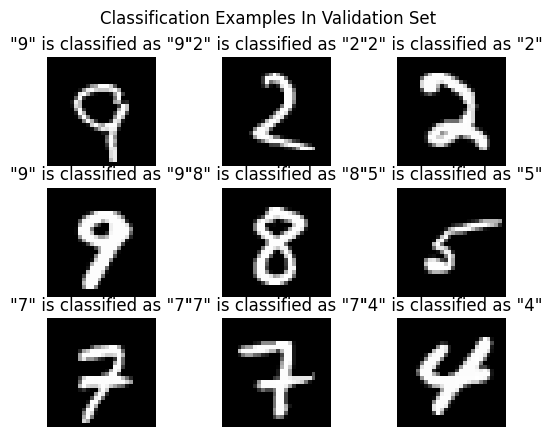

In [8]:
#SOME EXAMPLES ARE SHOWN AND VALIDATION OF PREDICTIONS OF SAID EXMAPLES
Y_pred = np.argmax(model.predict(X_test), axis=-1) #validation data is used to clssify the images based on the training images  

ids_imgs = np.random.randint(0,X_test.shape[0],9) #the images chosen for testing are randomized here
for i in range(len(ids_imgs)):
  idx = ids_imgs[i]
  img = X_test[idx,:].reshape(28,28)
  cat_original = np.argmax(Y_test[idx,:])
  cat_prediction = Y_pred[idx]

  #SHOWING PREDICTION RESULTS
  plt.subplot(3,3,i+1) #the information is presented in this arrange
  plt.imshow(img, cmap='gray')
  plt.axis ('off')
  plt.title ('"{}" is classified as "{}"'.format(cat_original,cat_prediction))
plt.suptitle('Classification Examples In Validation Set')
plt.show()

In [9]:
Y_pred[0]

7

In [10]:
np.argmax(Y_pred[0])

0

In [11]:
def plot_image(i, Y_pred, true_label, img):
  Y_pred, true_label, img = Y_pred, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(Y_pred)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(mnist_dataset[predicted_label],
                                100*np.max(Y_pred),
                                mnist_dataset[true_label]),
                                color=color)

def plot_value_array(i, Y_pred, true_label):
  Y_pred, true_label = Y_pred, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), Y_pred, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(Y_pred)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

NameError: ignored

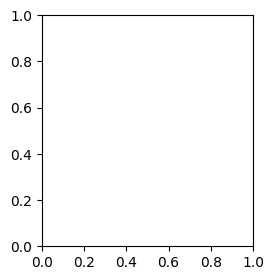

In [12]:
#GRAPHING
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, Y_pred[i], mnist_dataset)
plt.subplot(1,2,2)
x_train(i, Y_pred[i],  X_test)
plt.show()

I used the handwritten digits MNIST dataset because i wasn't sure if we had to use the fashion dataset or if we had to use that template and apply it to another MNIST dataset, so i used this one, yet i don't know why i wasn't able to make the histograms for the numbers and the precission for each prediction i tried using different variables but there are some argument errors that i  couldn't understand, i apologize.